In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filename in os.walk('/kaggle/input'):
  for filename in filename:
    print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv('/content/igreach.csv.csv' , encoding='latin1')

In [6]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


DATA EXPLORATION


In [7]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [9]:
df.isna().sum()


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [10]:
df.nunique()

Impressions       101
From Home          97
From Hashtags     100
From Explore       95
From Other         84
Saves              84
Comments           15
Shares             28
Likes              85
Profile Visits     59
Follows            29
Caption            90
Hashtags           54
dtype: int64

In [11]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


Correlation Analysis


In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)
impressions_correlations = correlation_matrix['Impressions'].drop("Impressions")
print(impressions_correlations)


                Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.844698       0.560760      0.893607   
From Home          0.844698   1.000000       0.177516      0.800573   
From Hashtags      0.560760   0.177516       1.000000      0.190453   
From Explore       0.893607   0.800573       0.190453      1.000000   
From Other         0.592960   0.555666       0.229623      0.495685   
Saves              0.779231   0.768817       0.305929      0.747803   
Comments          -0.028524   0.012716       0.161439     -0.158565   
Shares             0.634675   0.674985       0.219511      0.615731   
Likes              0.849835   0.698330       0.662124      0.653699   
Profile Visits     0.760981   0.531076       0.691345      0.531850   
Follows            0.889363   0.672675       0.555485      0.796019   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.592960  0.779231 -0.028524  0.634675  0.849835   
From Ho

<ipython-input-12-83ee7a491806>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [13]:
df.corr

<bound method DataFrame.corr of      Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follows  \
0           9       5    162              35        2   
1           7      14    224              48       10   
2          11       1    131              62       12   
3          10       7    213              23        8   
4           5       4    123               8        0   
..        ...     ...    ...             ...      ...   
114         2      38    373              73       80   
115         4       1    148              20       18   
116         0       1     92              34       10   
117         2      75    549             148      214   
118         5      26    443             611      228   

                                               Caption  \
0    Here are some of the most important data visua...   
1    Here are some of the best data science project...   
2    Learn how to train a machine learning model an...   
3    Heres how you can write a Python program to d...   
4    Plotting annotations while visualizing your da...   
..                                                 ...   
114  Here are some of the best data science certifi...   
115  Clustering is a machine learning technique use...   
116  Clustering music genres is a task of grouping ...   
117  Here are some of the best data science certifi...   
118  175 Python Projects with Source Code solved an...   

                                              Hashtags  
0    #finance #money #business #investing #investme...  
1    #healthcare #health #covid #data #datascience ...  
2    #data #datascience #dataanalysis #dataanalytic...  
3    #python #pythonprogramming #pythonprojects #py...  
4    #datavisualization #datascience #data #dataana...  
..                                                 ...  
114  #datascience #datasciencejobs #datasciencetrai...  
115  #machinelearning #machinelearningalgorithms #d...  
116  #machinelearning #machinelearningalgorithms #d...  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  

[119 rows x 13 columns]>

In [ ]:
Feature Engineering


In [15]:
df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']

# Print the updated DataFrame
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [16]:
df.head(10).transpose()


,0,1,2,3,4,5,6,7,8,9
Impressions,3920,5394,4021,4528,2518,3884,2621,3541,3749,4115
From Home,2586,2727,2085,2700,1704,2046,1543,2071,2384,2609
From Hashtags,1028,1838,1188,621,255,1214,599,628,857,1104
From Explore,619,1174,0,932,279,329,333,500,248,178
From Other,56,78,533,73,37,43,25,60,49,46
Saves,98,194,41,172,96,74,22,135,155,122
Comments,9,7,11,10,5,7,5,4,6,6
Shares,5,14,1,7,4,10,1,9,8,3
Likes,162,224,131,213,123,144,76,124,159,191
Profile Visits,35,48,62,23,8,9,26,12,36,31


EDA


In [18]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement Rate'],
      dtype='object')

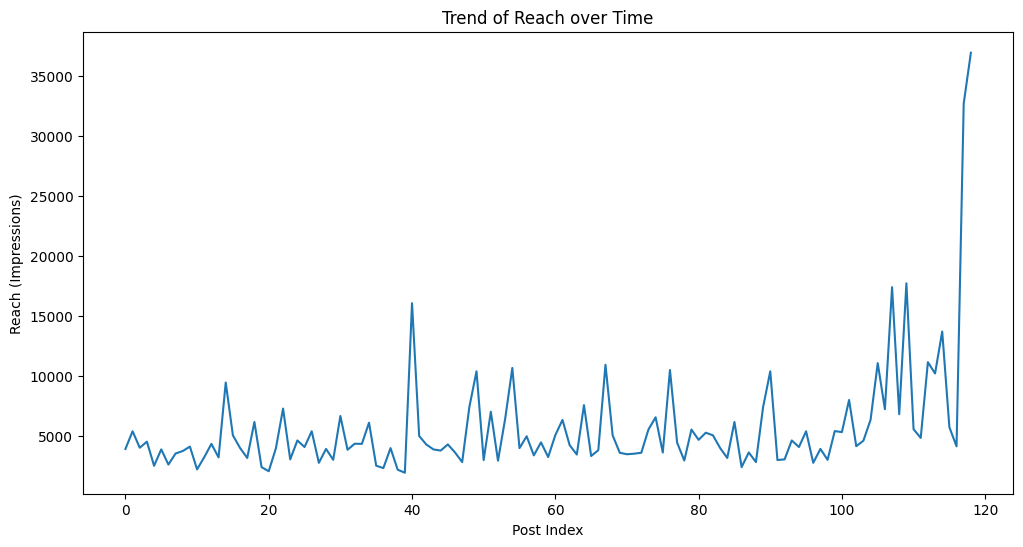

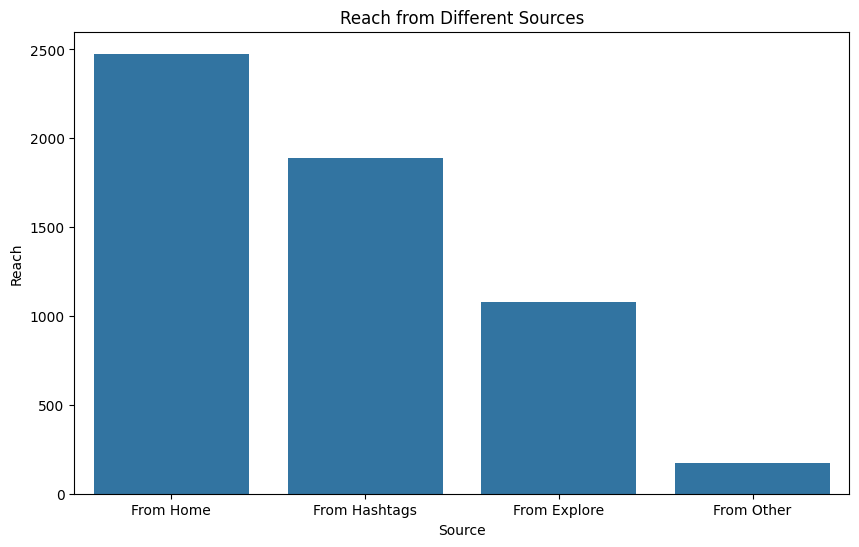

<ipython-input-19-f070026f327a>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


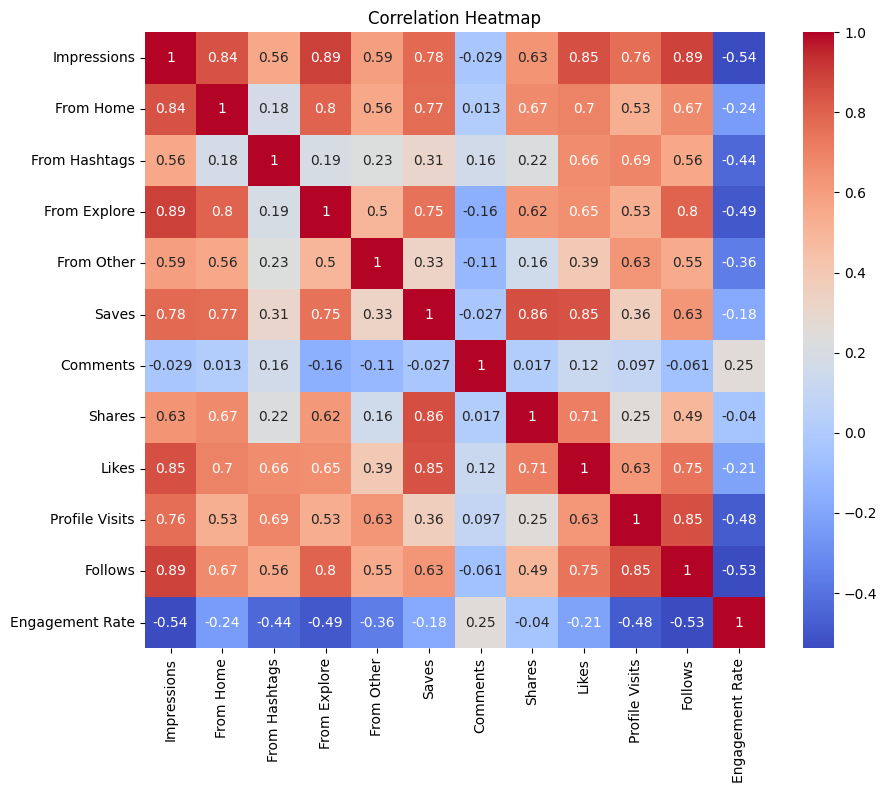

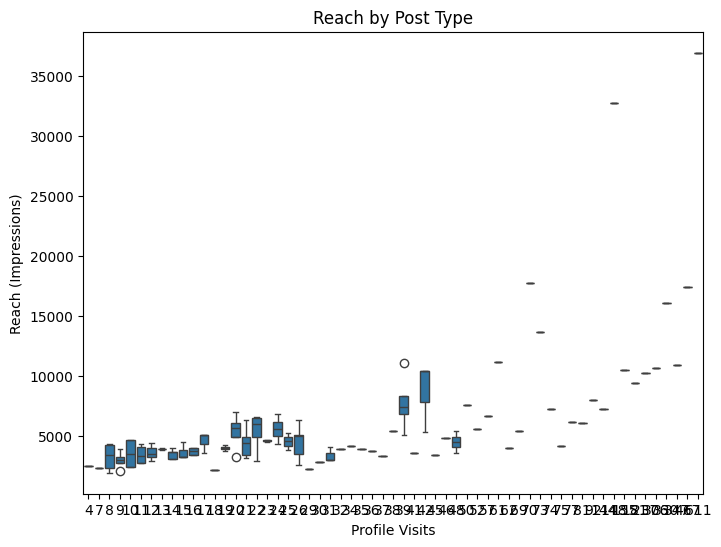

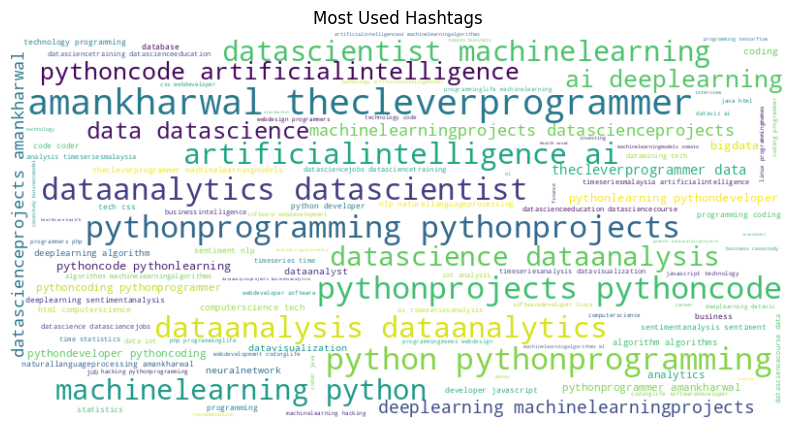

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Impressions'])
plt.xlabel('Post Index')
plt.ylabel('Reach (Impressions)')
plt.title('Trend of Reach over Time')
plt.show()

# Example 2: Bar chart of Reach from Different Sources
plt.figure(figsize=(10, 6))
sns.barplot(x=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
            y=[df['From Home'].mean(), df['From Hashtags'].mean(), df['From Explore'].mean(), df['From Other'].mean()])
plt.xlabel('Source')
plt.ylabel('Reach')
plt.title('Reach from Different Sources')
plt.show()

# Analyze correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analyze factors such as post type, time of posting, and content themes
# Example 3: Box plot of Reach by Post Type
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Profile Visits'], y=df['Impressions'])
plt.xlabel('Profile Visits')
plt.ylabel('Reach (Impressions)')
plt.title('Reach by Post Type')
plt.show()

# Example 4: Word cloud of the most used hashtags
from wordcloud import WordCloud

hashtags = ' '.join(df['Hashtags'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Hashtags')
plt.show()


In [20]:
df.index

RangeIndex(start=0, stop=119, step=1)

In [21]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement Rate'],
      dtype='object')

Predictive Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Select the relevant features for prediction
X = df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y = df['Impressions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the machine learning model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Use the trained model to predict the reach for new or future posts
new_data = pd.DataFrame({
    'From Home': [10],  # Example value, adjust according to your needs
    'From Hashtags': [5],  # Example value, adjust according to your needs
    'From Explore': [2],  # Example value, adjust according to your needs
    'From Other': [3],  # Example value, adjust according to your needs
    'Saves': [50],  # Example value, adjust according to your needs
    'Comments': [20],  # Example value, adjust according to your needs
    'Shares': [10],  # Example value, adjust according to your needs
    'Likes': [100],  # Example value, adjust according to your needs
    'Profile Visits': [30],  # Example value, adjust according to your needs
    'Follows': [5]  # Example value, adjust according to your needs
})

predicted_reach = model.predict(new_data)
print("Predicted Reach:", predicted_reach)

Mean Squared Error: 15766.2264963091
R-squared: 0.99959404890355
Predicted Reach: [82.23340518]


Interpretation and Recommendations


In [27]:
from sklearn.linear_model import LinearRegression



# Train the machine learning model
model = LinearRegression()
model.fit(X, y)

# Interpret the coefficients or feature importances
coefficients = model.coef_
feature_importances = abs(coefficients) / abs(coefficients).sum()

# Identify the key factors that significantly influence reach
key_factors = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Feature Importance': feature_importances
})
key_factors = key_factors.sort_values(by='Coefficient', ascending=False)

# Print the key factors and their impact on reach
print(key_factors)


          Feature  Coefficient  Feature Importance
3      From Other     1.083024            0.117865
6          Shares     1.014369            0.110394
2    From Explore     1.007242            0.109618
0       From Home     1.001839            0.109030
1   From Hashtags     0.999318            0.108756
9         Follows     0.502452            0.054682
7           Likes     0.184422            0.020071
8  Profile Visits    -0.197059            0.021446
4           Saves    -0.318018            0.034610
5        Comments    -2.880908            0.313529
